In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
from tensorflow.keras.datasets import  mnist

In [8]:
mnist = mnist.load_data()

In [12]:
from sklearn.datasets import fetch_openml

In [21]:
mnist = fetch_openml('mnist_784', as_frame=False, data_home="C:\\Users\\HP\\Documents\\Juwon\\Projects")

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
x_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
x_test, y_test = mnist.data[:10_000], mnist.target[:10_000]

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
%%time

clf.fit(x_train, y_train)

CPU times: total: 41.2 s
Wall time: 41.2 s


RandomForestClassifier(random_state=42)

In [26]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

print('train_accuracy:',accuracy_score(y_train,y_train_pred))
print('test_accuracy:',accuracy_score(y_test,y_test_pred))

train_accuracy: 1.0
test_accuracy: 1.0


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

In [39]:
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

In [40]:
print(x_train.shape,x_test.shape)
print(x_train_reduced.shape,x_test_reduced.shape)

(60000, 784) (10000, 784)
(60000, 154) (10000, 154)


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 100, random_state=42)

In [32]:
%%time
clf1.fit(x_train_reduced,y_train)

CPU times: total: 2min 10s
Wall time: 2min 11s


RandomForestClassifier(random_state=42)

In [41]:
y_train_pred1 = clf1.predict(x_train_reduced)
y_test_pred1 = clf1.predict(x_test_reduced)

In [42]:
print('train_accuracy:',accuracy_score(y_train,y_train_pred1))
print('test_accuracy:',accuracy_score(y_test,y_test_pred1))

train_accuracy: 1.0
test_accuracy: 1.0


In [43]:
from sklearn.manifold import TSNE

In [45]:
tsne = TSNE(n_components=2,random_state=42)

In [47]:
x_reduced = tsne.fit_transform(mnist.data)

In [51]:
y = mnist.target

In [56]:
y.astype(np.int8)

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

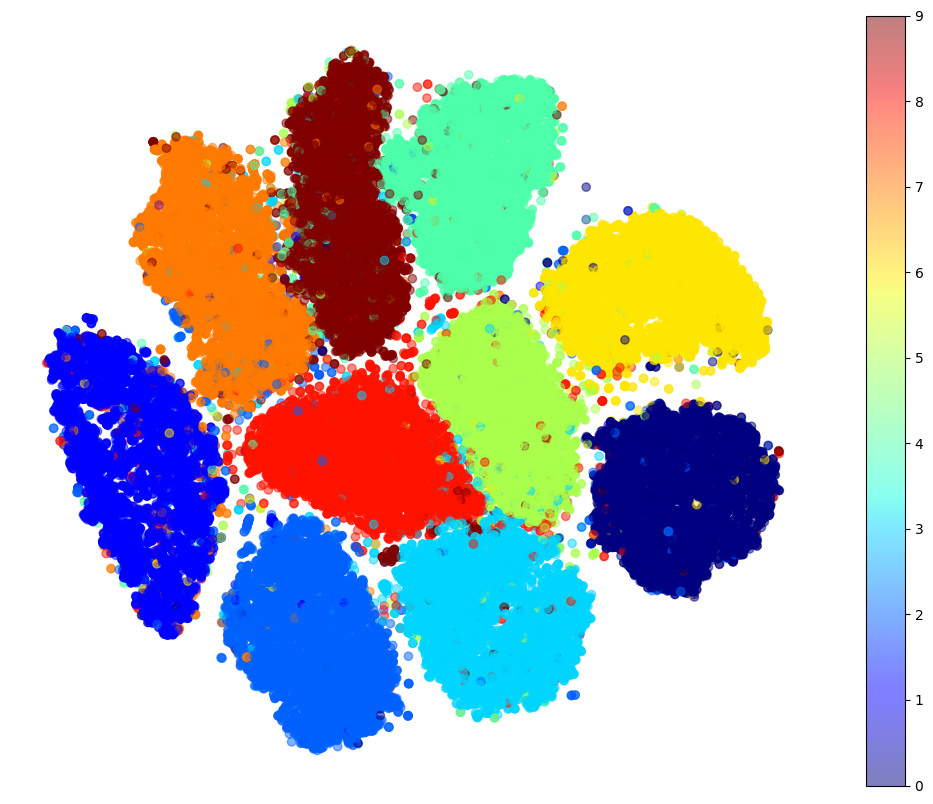

In [67]:
plt.figure(figsize=[13,10])
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=y.astype(np.int8), cmap='jet',alpha=0.5)
plt.colorbar()
plt.axis('off')
plt.show()

In [81]:
x_reduced[y == '4',0]

array([35.153164, 15.2794  , 32.540985, ...,  8.107758, 23.948988,
       13.412276], dtype=float32)

In [78]:
x_reduced[y=='4']

array([[35.153164, 85.71533 ],
       [15.2794  , 41.380943],
       [32.540985, 93.8249  ],
       ...,
       [ 8.107758, 46.04758 ],
       [23.948988, 61.57766 ],
       [13.412276, 47.21111 ]], dtype=float32)

In [79]:
x_reduced[y=='4'][0]

array([35.153164, 85.71533 ], dtype=float32)

In [90]:
x_reduced[y=='9',0]

array([-14.635373 , -25.052103 , -18.893997 , ..., -13.59386  ,
        -5.680255 ,  -6.9457793], dtype=float32)

In [99]:
d = pd.DataFrame([x_reduced[y=='4',0], x_reduced[y=='9',0]]).T
d = d.rename(columns={0:'4',1:'9'})

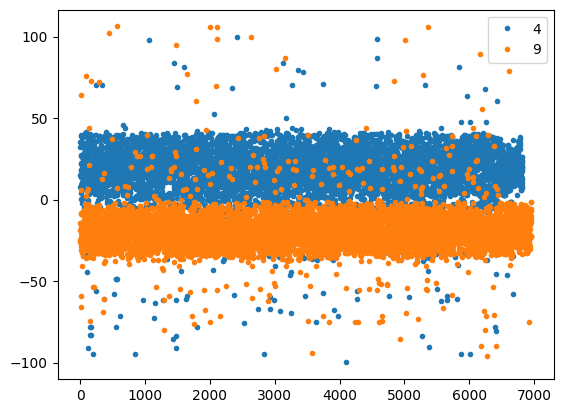

In [100]:
d.plot(style='.');